In [132]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
import json
from datetime import datetime
import dateutil.parser as dp

%matplotlib inline

In [133]:
data = json.load(open("C:\\Users\\knaren1x\\OneDrive - Intel Corporation\\Documents\\Dvr\\dataset\\KA51ME7196\\Trip_13-9thsept-08_30-10_00\\syncedData.json"))
data12 = json.load(open("C:\\Users\\knaren1x\\OneDrive - Intel Corporation\\Documents\\Dvr\\dataset\\KA51ME7196\\Trip_12-28thAug\\syncedData.json"))

In [134]:
df = pd.DataFrame.from_records(data["events"],columns=["time"])
df12 = pd.DataFrame.from_records(data12["events"],columns=["time"])

In [135]:
display(df)
display(df12)

len(df.index)
len(df12.index)

,time
0,2021-09-09T08:40:44.771000+05:30
1,2021-09-09T08:41:11.108000+05:30
2,2021-09-09T08:41:49.213000+05:30
3,2021-09-09T08:41:56.759000+05:30
4,2021-09-09T08:42:07.204000+05:30
5,2021-09-09T08:42:32.665000+05:30
6,2021-09-09T08:44:11.329000+05:30
7,2021-09-09T08:44:15.548000+05:30
8,2021-09-09T08:45:13.769000+05:30
9,2021-09-09T08:45:46.217000+05:30


,time
0,2021-08-28T10:59:31.883000+05:30
1,2021-08-28T11:00:31.550000+05:30
2,2021-08-28T11:00:40.994000+05:30
3,2021-08-28T11:00:40.994000+05:30
4,2021-08-28T11:00:51.877000+05:30
5,2021-08-28T11:01:21.900000+05:30
6,2021-08-28T11:01:48.328000+05:30
7,2021-08-28T11:01:51.543000+05:30
8,2021-08-28T11:02:44.998000+05:30
9,2021-08-28T11:04:36.547000+05:30


13

In [136]:
df['y']=1
df12['y']=1


In [137]:
display(df)
display(df12)

,time,y
0,2021-09-09T08:40:44.771000+05:30,1
1,2021-09-09T08:41:11.108000+05:30,1
2,2021-09-09T08:41:49.213000+05:30,1
3,2021-09-09T08:41:56.759000+05:30,1
4,2021-09-09T08:42:07.204000+05:30,1
5,2021-09-09T08:42:32.665000+05:30,1
6,2021-09-09T08:44:11.329000+05:30,1
7,2021-09-09T08:44:15.548000+05:30,1
8,2021-09-09T08:45:13.769000+05:30,1
9,2021-09-09T08:45:46.217000+05:30,1


,time,y
0,2021-08-28T10:59:31.883000+05:30,1
1,2021-08-28T11:00:31.550000+05:30,1
2,2021-08-28T11:00:40.994000+05:30,1
3,2021-08-28T11:00:40.994000+05:30,1
4,2021-08-28T11:00:51.877000+05:30,1
5,2021-08-28T11:01:21.900000+05:30,1
6,2021-08-28T11:01:48.328000+05:30,1
7,2021-08-28T11:01:51.543000+05:30,1
8,2021-08-28T11:02:44.998000+05:30,1
9,2021-08-28T11:04:36.547000+05:30,1


In [138]:
df.to_csv("C:\\Users\\knaren1x\\OneDrive - Intel Corporation\\Documents\\Dvr\\dataset\\KA51ME7196\\Trip_13-9thsept-08_30-10_00\\time.csv",index=False)
df12.to_csv("C:\\Users\\knaren1x\\OneDrive - Intel Corporation\\Documents\\Dvr\\dataset\\KA51ME7196\\Trip_12-28thAug\\time12.csv",index=False)

In [139]:
#t = '1984-06-02T19:05:00.000Z'
#parsed_t = dp.parse(t)
#t_in_seconds = parsed_t.timestamp()
#print(t_in_seconds)




In [140]:
df['time']
#datetime.fromisoformat(df['time'][0])
#parsed_t = dp.parse(df['time'][0])
#t_in_seconds = parsed_t.timestamp()
for i in range(0,107):
    
    parsed_t = dp.parse(df['time'][i])
    t_in_seconds = parsed_t.timestamp()
    df['time'][i] = t_in_seconds

for i in range(0,13):
    
    parsed_t = dp.parse(df12['time'][i])
    t_in_seconds = parsed_t.timestamp()
    df12['time'][i] = t_in_seconds
    
pd.set_option("display.max_rows",None,"display.max_columns",None)
print(df['time'])
print(df12['time'])



0      1631157044.771
1      1631157071.108
2      1631157109.213
3      1631157116.759
4      1631157127.204
5      1631157152.665
6      1631157251.329
7      1631157255.548
8      1631157313.769
9      1631157346.217
10     1631157357.442
11     1631157379.325
12     1631157480.444
13     1631157491.107
14     1631157502.069
15     1631157549.441
16       1631157558.3
17     1631157589.763
18     1631157666.653
19       1631157700.9
20     1631157748.106
21     1631157749.982
22     1631157780.107
23     1631157809.328
24     1631157815.106
25     1631157835.106
26     1631157838.436
27     1631157848.886
28     1631157856.443
29     1631157856.443
30     1631157860.441
31     1631157867.443
32       1631157917.9
33     1631157929.776
34     1631157938.109
35     1631158006.095
36     1631158050.867
37      1631158126.77
38     1631158136.107
39     1631158154.885
40     1631158155.105
41     1631158194.106
42     1631158237.542
43     1631158248.325
44     1631158264.443
45      16

In [141]:
df.to_csv("C:\\Users\\knaren1x\\OneDrive - Intel Corporation\\Documents\\Dvr\\dataset\\KA51ME7196\\Trip_13-9thsept-08_30-10_00\\time.csv",index=False)
df.to_csv("C:\\Users\\knaren1x\\OneDrive - Intel Corporation\\Documents\\Dvr\\dataset\\KA51ME7196\\Trip_12-28thAug\\time.csv",index=False)
coords= df[['time','y']].copy()
coords12= df12[['time','y']].copy()
display(coords)
display(coords12)

,time,y
0,1631157044.771,1
1,1631157071.108,1
2,1631157109.213,1
3,1631157116.759,1
4,1631157127.204,1
5,1631157152.665,1
6,1631157251.329,1
7,1631157255.548,1
8,1631157313.769,1
9,1631157346.217,1


,time,y
0,1630128571.883,1
1,1630128631.55,1
2,1630128640.994,1
3,1630128640.994,1
4,1630128651.877,1
5,1630128681.9,1
6,1630128708.328,1
7,1630128711.543,1
8,1630128764.998,1
9,1630128876.547,1


In [157]:
epsilon = 10
db = DBSCAN(eps=epsilon, min_samples=3).fit((coords))
epsilon12 = 30
db12 = DBSCAN(eps=epsilon12, min_samples=3).fit((coords12))

In [158]:
cluster_labels = db.labels_
cluster_labels12 = db12.labels_
num_clusters = len(set(cluster_labels))
num_clusters12 = len(set(cluster_labels12))
print(num_clusters)
print(num_clusters12)
display(cluster_labels)
display(cluster_labels12)

3
4


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1], dtype=int64)

array([-1,  0,  0,  0,  0,  1,  1,  1, -1,  2,  2,  2, -1], dtype=int64)

In [159]:
trip13 =silhouette_score(coords,cluster_labels)
print(trip13)
trip12=silhouette_score(coords12,cluster_labels12)
print(trip12)

-0.39467288675459977
0.39955369542858044


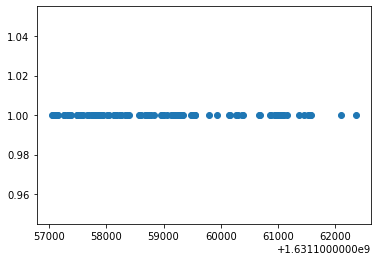

In [147]:
#plt.scatter(df['time'], df['y'])
plt.scatter(df['time'], df['y'],cmap='spectral')
#plt.scatter(df12['time'], df['y'])
#plt.scatter(df12['time'], df['y'],cmap='spectral')


#plt.scatter(coords[:,0],coords[:,1])

In [82]:
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
#pd.set_option("display.max_rows",None,"display.max_columns",None)
display(clusters)

0                  time  y
2  1631157109.213  1
3  1...
1                  time  y
6  1631157251.329  1
7  1...
2                   time  y
15  1631157549.441  1
16...
3                   time  y
20  1631157748.106  1
21...
4                   time  y
23  1631157809.328  1
24...
5                   time  y
25  1631157835.106  1
26...
6                   time  y
27  1631157848.886  1
28...
7                   time  y
33  1631157929.776  1
34...
8                   time  y
37   1631158126.77  1
38...
9                   time  y
39  1631158154.885  1
40...
10                  time  y
48  1631158573.441  1
49...
11                  time  y
67  1631159280.886  1
68...
12                  time  y
73  1631159531.444  1
74...
13                  time  y
75  1631159543.432  1
76...
14                  time  y
89  1631160951.997  1
90...
15         Empty DataFrame
Columns: [time, y]
Index: []
dtype: object